In [4]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import re

In [5]:
path: str = './data/'
prokaryotes: pd.DataFrame = pd.read_csv(os.path.join(path, "prokaryotes_323columns.csv"))
droplist = [0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
col = prokaryotes.columns
dropl2 = []
""" for n in col:
    if len(n) == 2:
        dropl2.append(n) """
prokaryotes = prokaryotes.drop(prokaryotes.columns[droplist], axis=1)
prokaryotes = prokaryotes.drop(dropl2, axis=1)
prokaryotes = prokaryotes.drop(['helixind','helixseq'],axis = 1)
prokaryotes = prokaryotes.reset_index(drop=True)

C:\Users\tobia\AppData\Local\Temp\ipykernel_22356\1954923114.py:2: DtypeWarning: Columns (8,21,22,23,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  prokaryotes: pd.DataFrame = pd.read_csv(os.path.join(path, "prokaryotes_323columns.csv"))


In [6]:
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import SparsePCA

In [7]:
prokaryotes.replace([np.inf, -np.inf], np.nan, inplace=True)
prokaryotes = prokaryotes.fillna(0)

In [9]:
scaled_prokaryotes = StandardScaler().fit_transform(prokaryotes)

In [10]:
PCA_prokaryotes = PCA().fit(scaled_prokaryotes)

In [11]:
eigenvalues = PCA_prokaryotes.explained_variance_ 
prokaryotes_PCA = PCA(n_components=np.sum(eigenvalues > 0.7)).fit_transform(scaled_prokaryotes)

In [12]:
prokaryotes_PCA_df = pd.DataFrame(data = prokaryotes_PCA, columns = [f'PC{i+1}' for i in range(np.sum(eigenvalues > 0.7))])

In [13]:
variance = PCA_prokaryotes.explained_variance_ratio_


In [14]:
prokaryotesmp =  pd.read_csv(os.path.join(path, "prokaryotes_323columns.csv"))

C:\Users\tobia\AppData\Local\Temp\ipykernel_22356\3362361442.py:1: DtypeWarning: Columns (8,21,22,23,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  prokaryotesmp =  pd.read_csv(os.path.join(path, "prokaryotes_323columns.csv"))


In [15]:
""" low_threshold = prokaryotesmp['meltPoint'].quantile(0.33)
high_threshold = prokaryotesmp['meltPoint'].quantile(0.67)
for n in prokaryotesmp.index:
    if prokaryotesmp.loc[n,'meltPoint'] <= low_threshold:
        prokaryotes_PCA_df.loc[n, 'meltPoint1'] = 'low_Tm'
    elif prokaryotesmp.loc[n,'meltPoint'] >= high_threshold:
        prokaryotes_PCA_df.loc[n, 'meltPoint1'] = 'high_Tm'
    else:
        prokaryotes_PCA_df.loc[n, 'meltPoint1'] = 'mid_Tm' """

In [55]:
for n in prokaryotesmp.index:
    if prokaryotesmp.loc[n,'meltPoint'] <= prokaryotesmp['meltPoint'].quantile(0.1):
        prokaryotes_PCA_df.loc[n, 'meltPoint2'] = 'low_Tm'
    elif prokaryotesmp.loc[n,'meltPoint'] >= prokaryotesmp['meltPoint'].quantile(0.45) and prokaryotesmp.loc[n,'meltPoint'] <= prokaryotesmp['meltPoint'].quantile(0.55):
        prokaryotes_PCA_df.loc[n, 'meltPoint2'] = 'mid_Tm'
    elif prokaryotesmp.loc[n,'meltPoint'] >= prokaryotesmp['meltPoint'].quantile(0.90):
        prokaryotes_PCA_df.loc[n, 'meltPoint2'] = 'high_Tm'
    else:
        prokaryotes_PCA_df.loc[n, 'meltPoint2'] = np.nan

In [17]:
loadings = PCA(n_components=20).fit(scaled_prokaryotes).components_.T
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=prokaryotes.columns)

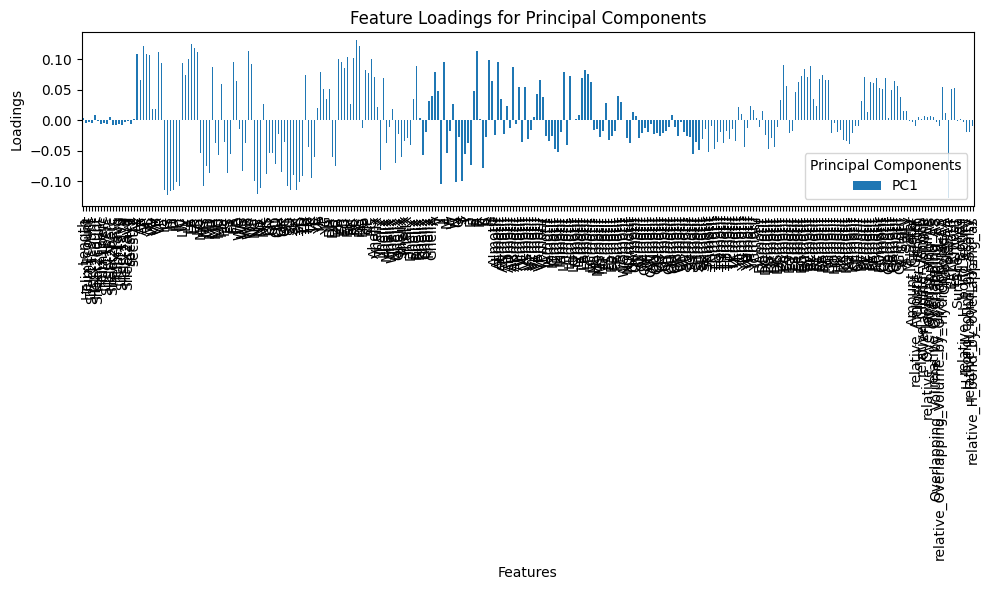

In [18]:
plt.figure(figsize=(10, 6))
loadings_df['PC1'].plot(kind='bar', figsize=(10, 6))
plt.title('Feature Loadings for Principal Components')
plt.xlabel('Features')
plt.ylabel('Loadings')
plt.xticks(rotation=90)
plt.legend(title='Principal Components')
plt.tight_layout()
plt.show()

In [19]:
loadings_df[loadings_df['PC1'] > 0.10]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
AL,0.108309,0.111907,0.028280,-0.059065,0.077318,-0.074855,0.018242,0.000810,0.000514,0.009680,0.114083,0.053961,0.046195,0.027871,-0.018571,-0.067404,-0.005769,0.040795,0.008740,0.001849
AR,0.122228,0.043758,-0.031003,0.013260,0.020060,-0.075001,0.004527,0.095762,-0.015217,-0.054993,0.075978,-0.015526,0.117176,-0.083319,-0.074862,-0.064849,0.046462,0.063534,0.002845,-0.012113
AP,0.107965,0.089855,-0.006348,-0.064659,-0.060230,-0.016268,-0.016713,-0.017487,-0.000746,-0.069781,0.080994,0.019239,0.150643,-0.063271,-0.000755,-0.109876,0.071929,0.079632,-0.007706,-0.026276
VL,0.106679,0.069725,0.030245,-0.065675,0.058281,-0.072028,0.007168,0.006210,-0.018574,-0.022449,-0.036494,0.054885,-0.129957,0.157820,0.057249,0.072678,-0.056435,0.082477,0.007628,0.060651
VR,0.111798,-0.032616,-0.047307,0.031310,-0.024258,-0.063491,-0.013191,0.126030,-0.040229,-0.107922,-0.111616,-0.038496,-0.062680,0.027223,-0.004223,0.096830,0.005074,0.110430,-0.000878,0.048481
LE,0.101147,0.023976,0.016007,0.058522,0.120485,-0.060778,-0.000844,-0.093507,0.015440,0.123443,0.011886,0.125997,-0.057008,0.046277,0.080042,0.010040,-0.053127,-0.031088,-0.096897,0.014796
LR,0.125399,0.028906,0.017960,0.036360,0.125089,0.002150,0.022831,0.089184,-0.005384,0.056135,0.013828,0.031444,-0.058786,0.073276,0.041398,-0.014056,-0.033574,-0.018455,0.033855,0.007000
LP,0.118339,0.074703,0.047247,-0.036631,0.061238,0.066499,0.004612,-0.018233,0.009402,0.053667,0.014432,0.071262,-0.043347,0.109805,0.126219,-0.055057,-0.016816,-0.010282,0.027810,-0.005026
LG,0.111453,0.059050,0.048755,-0.088305,0.037478,-0.023951,0.008769,-0.000870,-0.010324,0.021588,0.061764,0.048385,-0.115163,0.072409,-0.024550,0.004902,-0.095330,-0.163280,0.062497,-0.035808
WR,0.113960,-0.019113,-0.028075,0.092741,0.048880,0.052998,0.012809,0.159795,-0.015500,0.016332,-0.034670,-0.049891,0.022162,-0.015578,-0.017184,0.003610,0.032483,-0.002619,0.028023,-0.008946


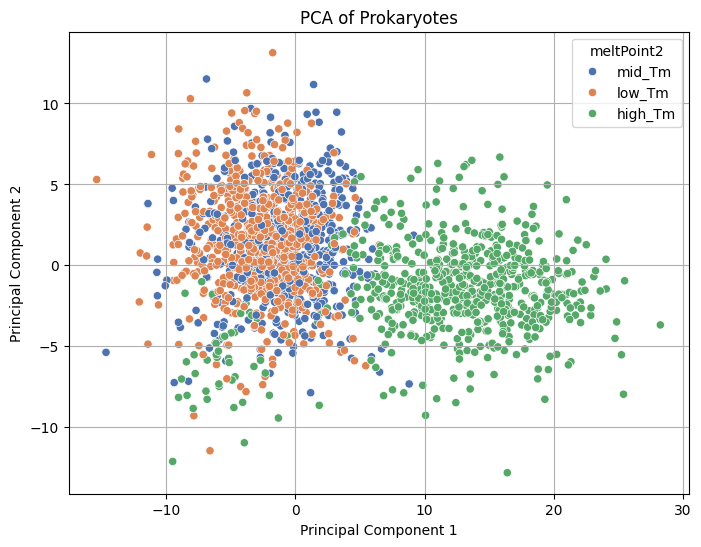

In [56]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data = prokaryotes_PCA_df[prokaryotes_PCA_df['meltPoint2'].isin(['high_Tm','mid_Tm','low_Tm'])], x = 'PC1', y = 'PC2', hue = 'meltPoint2',palette = 'deep')
#sns.scatterplot(data = prokaryotes_PCA_df, x = 'PC1', y = 'PC3', hue = 'meltPoint',palette = 'deep')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Prokaryotes')
plt.grid()
plt.show()

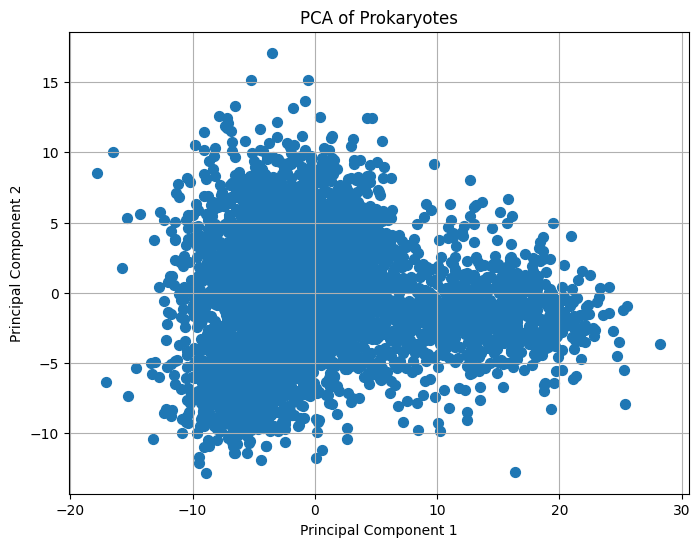

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(prokaryotes_PCA_df['PC1'], prokaryotes_PCA_df['PC2'], s = 50, )
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Prokaryotes')
plt.grid()
plt.show()

Sparse PCA

In [22]:
'''sPCA_prokaryotes = SparsePCA().fit(scaled_prokaryotes)
seigenvalues = sPCA_prokaryotes.explained_variance_ 
sprokaryotes_sPCA = SparsePCA(n_components=np.sum(seigenvalues > 0.7)).fit_transform(scaled_prokaryotes)
sprokaryotes_sPCA_df = pd.DataFrame(data = sprokaryotes_sPCA, columns = [f'PC{i+1}' for i in range(np.sum(seigenvalues > 0.7))])
svariance = sPCA_prokaryotes.explained_variance_ratio_'''

"sPCA_prokaryotes = SparsePCA().fit(scaled_prokaryotes)\nseigenvalues = sPCA_prokaryotes.explained_variance_ \nsprokaryotes_sPCA = SparsePCA(n_components=np.sum(seigenvalues > 0.7)).fit_transform(scaled_prokaryotes)\nsprokaryotes_sPCA_df = pd.DataFrame(data = sprokaryotes_sPCA, columns = [f'PC{i+1}' for i in range(np.sum(seigenvalues > 0.7))])\nsvariance = sPCA_prokaryotes.explained_variance_ratio_"

In [23]:
sum(variance[0:20])

0.5679278317761807

PCA with only top 30% and bottom 30% of meltpoints

In [24]:
def pain(data, by= None, lower = 0.1, upper = 0.9):
    """
    data: pandas DataFrame or Series, if series then no argument by \n
    by: column to filter by (string) (only applicable if data is a DataFrame) \n
    upper and lower: threshold percentages, for example lower = 0.1, upper = 0.9"""
    import pandas as pd
    if isinstance(data, pd.DataFrame):
        lower_threshold = data[by].quantile(lower)
        upper_threshold = data[by].quantile(upper)
        return data[(data[by] <= lower_threshold) | (data[by] >= upper_threshold)].reset_index(drop=True)
    if isinstance(data, pd.Series):
        lower_threshold = data.quantile(lower)
        upper_threshold = data.quantile(upper)
        return data[(data <= lower_threshold) | (data >= upper_threshold)].reset_index(drop=True)
    else:
        raise ValueError('Invalid data input')

In [46]:
prokaryotes2: pd.DataFrame = pd.read_csv(os.path.join(path, "prokaryotes_323columns.csv"))
prokaryotesquant = pain(prokaryotes2,'meltPoint',0.2,0.8)
qprokaryotesmp = prokaryotesquant.copy()
droplist = [0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
col = prokaryotesquant.columns
dropl2 = []
""" for n in col:
    if len(n) == 2:
        dropl2.append(n) """
prokaryotesquant = prokaryotesquant.drop(prokaryotes2.columns[droplist], axis=1)
#prokaryotes = prokaryotes.drop(dropl2, axis=1)
prokaryotesquant = prokaryotesquant.drop(['helixind','helixseq'],axis = 1)
prokaryotesquant = prokaryotesquant.reset_index(drop=True)

C:\Users\tobia\AppData\Local\Temp\ipykernel_22356\2957465745.py:1: DtypeWarning: Columns (8,21,22,23,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  prokaryotes2: pd.DataFrame = pd.read_csv(os.path.join(path, "prokaryotes_323columns.csv"))


In [47]:
prokaryotesquant.replace([np.inf, -np.inf], np.nan, inplace=True)
prokaryotesquant = prokaryotesquant.fillna(0)
scaled_qprokaryotes = StandardScaler().fit_transform(prokaryotesquant)
qPCA_prokaryotes = PCA().fit(scaled_qprokaryotes)
qeigenvalues = qPCA_prokaryotes.explained_variance_ 
qprokaryotes_PCA = PCA(n_components=np.sum(qeigenvalues > 0.7)).fit_transform(scaled_qprokaryotes)
qprokaryotes_PCA_df = pd.DataFrame(data = qprokaryotes_PCA, columns = [f'PC{i+1}' for i in range(np.sum(qeigenvalues > 0.7))])
qvariance = qPCA_prokaryotes.explained_variance_ratio_
qloadings = PCA(n_components=20).fit(scaled_qprokaryotes).components_.T
qloadings_df = pd.DataFrame(qloadings, columns=[f'PC{i+1}' for i in range(qloadings.shape[1])], index=prokaryotesquant.columns)

In [62]:
for n in qprokaryotesmp.index:
    if qprokaryotesmp.loc[n,'meltPoint'] <= qprokaryotesmp['meltPoint'].quantile(0.1):
        qprokaryotes_PCA_df.loc[n, 'meltPoint2'] = 'low_Tm'
    elif qprokaryotesmp.loc[n,'meltPoint'] >= qprokaryotesmp['meltPoint'].quantile(0.9) and qprokaryotesmp.loc[n,'meltPoint'] <= qprokaryotesmp['meltPoint'].quantile(0.95):
        qprokaryotes_PCA_df.loc[n, 'meltPoint2'] = 'mid_Tm'
    elif qprokaryotesmp.loc[n,'meltPoint'] >= qprokaryotesmp['meltPoint'].quantile(0.99):
        qprokaryotes_PCA_df.loc[n, 'meltPoint2'] = 'high_Tm'
    else:
        qprokaryotes_PCA_df.loc[n, 'meltPoint2'] = np.nan

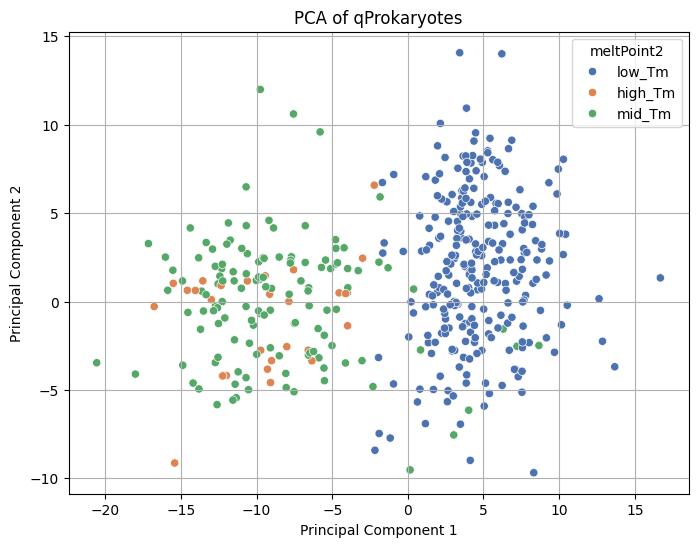

In [63]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data = qprokaryotes_PCA_df[qprokaryotes_PCA_df['meltPoint2'].isin(['high_Tm','mid_Tm','low_Tm'])], x = 'PC1', y = 'PC2', hue = 'meltPoint2',palette = 'deep')
#sns.scatterplot(data = prokaryotes_PCA_df, x = 'PC1', y = 'PC3', hue = 'meltPoint',palette = 'deep')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of qProkaryotes')
plt.grid()
plt.show()

In [68]:
qloadings_df['PC1'][qloadings_df['PC1'] < -0.09]

AL   -0.098607
AR   -0.110227
AP   -0.102202
VL   -0.099798
VR   -0.101958
VP   -0.090916
LE   -0.098817
LR   -0.111725
LP   -0.106835
LG   -0.101958
FR   -0.091206
WR   -0.103477
WP   -0.090273
ER   -0.096890
EP   -0.096587
EG   -0.091475
RH   -0.095638
RC   -0.093620
RP   -0.115524
RG   -0.110549
PG   -0.097316
R    -0.103006
P    -0.094959
Name: PC1, dtype: float64